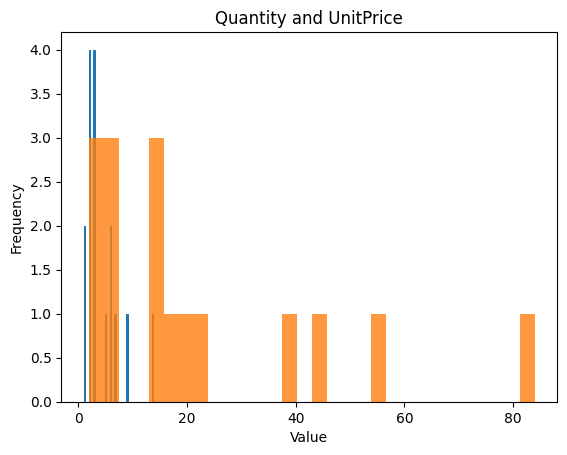

/var/folders/ff/ryjkbdzn6cxb1k20vjf417vm0000gn/T/ipykernel_74627/2152916846.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNormalized[col] = dfNormalized[col] / dfNormalized[col].abs().max()


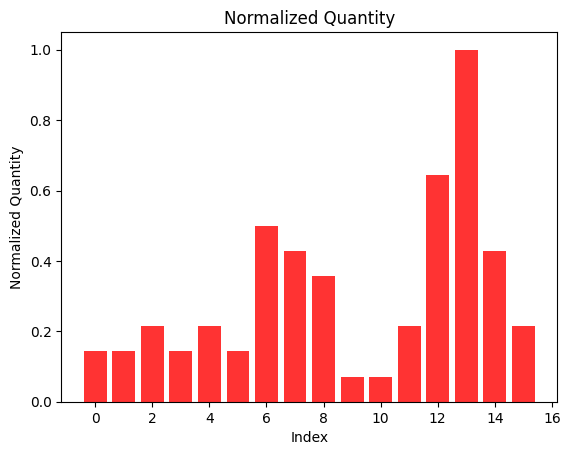

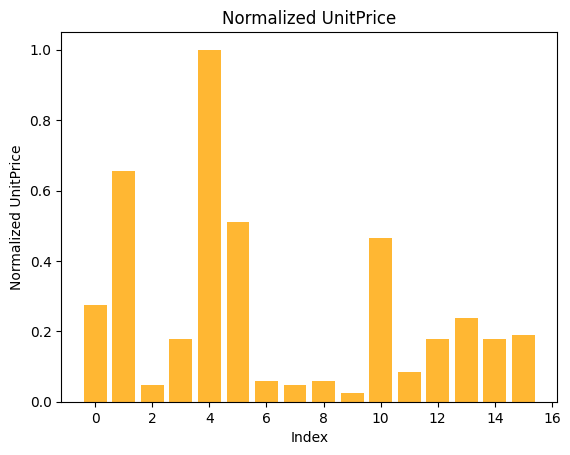

Normalized Data:
   Quantity  UnitPrice
0  0.142857   0.273810
1  0.142857   0.654762
2  0.214286   0.047619
3  0.142857   0.178571
4  0.214286   1.000000


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data (replace with your actual file path)
df = pd.read_excel('A5-Normalization.xlsx')

# Step 1: Identify Functional Dependencies
# Assuming OrderID uniquely determines CustomerName, Segment, ShippingAddr, Region, and Salesperson
# Assuming OrderID and ProductID together uniquely determine Quantity and UnitPrice

# Step 2: Apply First Normal Form (1NF)
# Data seems to be in 1NF as there are no multi-valued attributes

# Step 3: Apply Second Normal Form (2NF)
# No partial dependencies found, so already in 2NF

# Step 4: Apply Third Normal Form (3NF)
# Break the table into separate tables for orders and order details
orders = df[['OrderID', 'CustomerName', 'Segment', 'ShippingAddr', 'Region', 'Salesperson']]
order_details = df[['OrderID', 'ProductID', 'Quantity', 'UnitPrice']]

# Step 5: Higher Normal Forms (BCNF, 4NF, 5NF)
# Further normalization may be needed depending on the complexity of the data and specific requirements

# Visualization of unnormalized data
plt.hist(df['Quantity'], bins=30, alpha=1, label='Quantity')
plt.hist(df['UnitPrice'], bins=30, alpha=0.8, label='UnitPrice')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Quantity and UnitPrice')
plt.show()

# Normalization process
dfNormalized = df[['Quantity', 'UnitPrice']]

# Step 6: Provide a Detailed Account
# Normalize each attribute by dividing it by the absolute maximum value in the column
for col in dfNormalized.columns:
    dfNormalized[col] = dfNormalized[col] / dfNormalized[col].abs().max()

# Visualization of normalized data
plt.bar(dfNormalized.index, dfNormalized['Quantity'], alpha=0.8, label='Quantity', color='red')
plt.xlabel('Index')
plt.ylabel('Normalized Quantity')
plt.title('Normalized Quantity')
plt.show()

plt.bar(dfNormalized.index, dfNormalized['UnitPrice'], alpha=0.8, label='UnitPrice', color='orange')
plt.xlabel('Index')
plt.ylabel('Normalized UnitPrice')
plt.title('Normalized UnitPrice')
plt.show()

# Print normalized DataFrame
print("Normalized Data:")
print(dfNormalized.head())
